# Transformações Lineares — Rotação e Cisalhamento (Shear)

1. **Rotação horária de 90°**.
2. **Cisalhamento (Shear) em x**.

Serão apresentados:
- As **matrizes de transformação**, obtidas a partir das imagens dos vetores unitários.
- O **efeito geométrico** dessas transformações sobre a base canônica e sobre vetores arbitrários.
- **Gráficos com Matplotlib**, ilustrando cada transformação passo a passo.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Configuração de exibição numérica (sem notação científica)
np.set_printoptions(suppress=True, floatmode='fixed')

## 1️⃣ Função auxiliar para visualização gráfica

In [2]:
# Função que plota vetores 2D a partir da origem
# - Cada vetor é desenhado como uma seta saindo do ponto (0,0)
# - Usamos 'marker=o' apenas para destacar o ponto final do vetor
# - Os eixos são centralizados e proporcionais para evitar distorção visual
def plot_vectors(vectors, labels, title, xlim=(-3,3), ylim=(-3,3)):
    plt.figure()
    for v, lbl in zip(vectors, labels):
        plt.plot([0, v[0]], [0, v[1]], marker='o', label=lbl)
    plt.axhline(0, color='gray', linewidth=0.7)
    plt.axvline(0, color='gray', linewidth=0.7)
    plt.gca().set_aspect('equal', 'box')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.title(title)
    plt.legend()

## 2️⃣ Definição da base canônica

In [3]:
# Vetores unitários do plano cartesiano (base canônica)
e1 = np.array([1, 0])  # vetor no eixo x
e2 = np.array([0, 1])  # vetor no eixo y

## 3️⃣ Rotação de 90° no sentido horário

Matriz de rotação (90° horário):
 [[ 0.  1.]
 [-1.  0.]]
R·e1 = [ 0. -1.] 
R·e2 = [1. 0.]


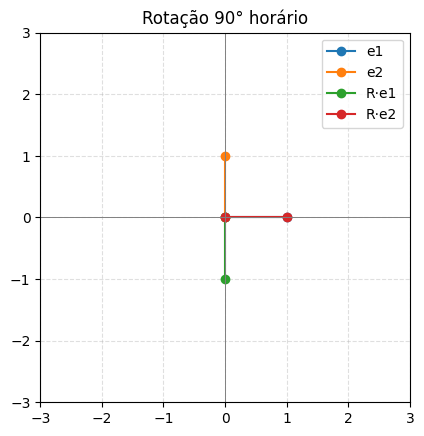

In [4]:
# Ângulo de rotação: -90° (horário)
theta = -np.pi / 2

# Matriz de rotação padrão R(θ) = [[cosθ, -sinθ], [sinθ, cosθ]]
R = np.round([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]], 0)

# Aplicando R sobre os vetores da base canônica
R_e1 = R @ e1
R_e2 = R @ e2

print('Matriz de rotação (90° horário):\n', R)
print('R·e1 =', R_e1, '\nR·e2 =', R_e2)

# Visualização da base original e da base rotacionada
plot_vectors([e1, e2, R_e1, R_e2],
             ['e1','e2','R·e1','R·e2'],
             'Rotação 90° horário')

## 4️⃣ Cisalhamento (Shear) em x


Matriz de cisalhamento em x (k=0.5):
 [[1.  0.5]
 [0.  1. ]]
S·e1 = [1. 0.] 
S·e2 = [0.5 1. ]


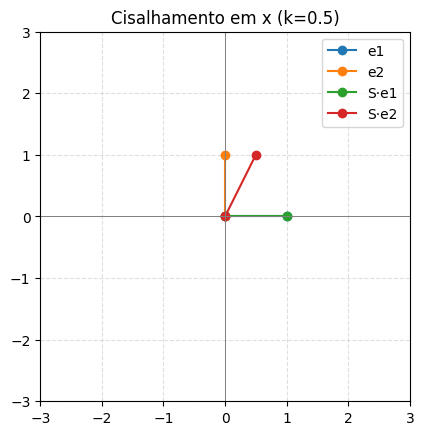

In [5]:
# O cisalhamento (shear) em x desloca cada ponto horizontalmente em proporção ao seu valor de y.
# Matriz: S = [[1, k], [0, 1]] onde k é o fator de cisalhamento.
k = 0.5
S = np.array([[1, k], [0, 1]])

# Aplicando S sobre os vetores da base canônica
S_e1 = S @ e1
S_e2 = S @ e2

print('\nMatriz de cisalhamento em x (k=0.5):\n', S)
print('S·e1 =', S_e1, '\nS·e2 =', S_e2)

# Visualização da base original e cisalhada
plot_vectors([e1, e2, S_e1, S_e2],
             ['e1','e2','S·e1','S·e2'],
             'Cisalhamento em x (k=0.5)')

## 5️⃣ Aplicação das transformações em vetores arbitrários


Transformações de v1:
v1     = [2 1]
R·v1   = [ 1. -2.]
S·v1   = [2.5 1. ]
S·R·v1 = [ 0. -2.]
R·S·v1 = [ 1.  -2.5]

Transformações de v2:
v2     = [-1  2]
R·v2   = [2. 1.]
S·v2   = [0. 2.]
S·R·v2 = [2.5 1. ]
R·S·v2 = [2. 0.]


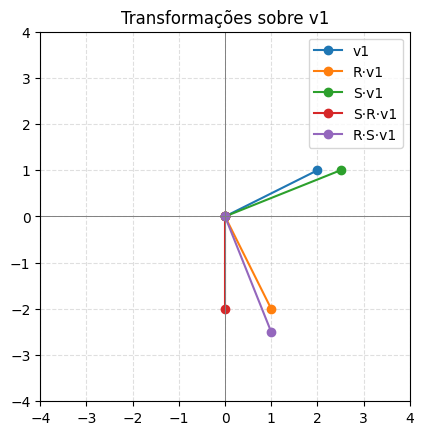

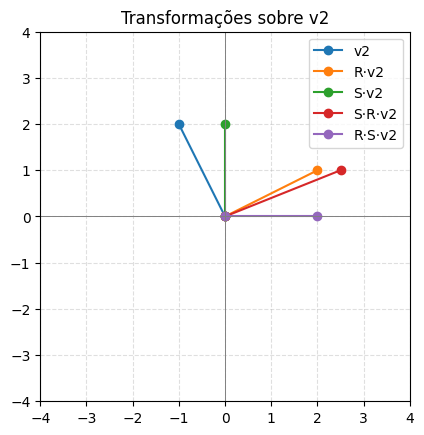

In [6]:
# Definimos dois vetores quaisquer para observar o efeito das transformações.
v1 = np.array([2, 1])
v2 = np.array([-1, 2])

# Função que aplica todas as transformações e exibe resultados e gráficos
def aplicar_e_mostrar(v, nome):
    Rv = R @ v          # rotação
    Sv = S @ v          # cisalhamento
    SRv = S @ (R @ v)   # shear após rotação
    RSv = R @ (S @ v)   # rotação após shear

    print(f'\nTransformações de {nome}:')
    print(f'{nome}     = {v}')
    print(f'R·{nome}   = {Rv}')
    print(f'S·{nome}   = {Sv}')
    print(f'S·R·{nome} = {SRv}')
    print(f'R·S·{nome} = {RSv}')

    # Visualização das transformações aplicadas ao vetor
    plot_vectors([v, Rv, Sv, SRv, RSv],
                 [f'{nome}', f'R·{nome}', f'S·{nome}', f'S·R·{nome}', f'R·S·{nome}'],
                 f'Transformações sobre {nome}', xlim=(-4,4), ylim=(-4,4))

# Aplicando a função para v1 e v2
aplicar_e_mostrar(v1, 'v1')
aplicar_e_mostrar(v2, 'v2')

## 6️⃣ Composição das transformações

In [7]:
# As transformações lineares podem ser compostas multiplicando as matrizes.
# Porém, a ordem importa: em geral, R·S ≠ S·R.
SR = S @ R   # aplica R primeiro, depois S
RS = R @ S   # aplica S primeiro, depois R

print('\nMatriz composta S·R =\n', SR)
print('Matriz composta R·S =\n', RS)


Matriz composta S·R =
 [[-0.5  1. ]
 [-1.   0. ]]
Matriz composta R·S =
 [[ 0.   1. ]
 [-1.  -0.5]]


## ✅ Conclusão
- A **rotação** altera a direção dos vetores, preservando seu comprimento.
- O **cisalhamento** deforma o plano, inclinando os eixos sem alterar áreas de forma proporcional.
- A **ordem de aplicação** das transformações altera o resultado (não comutatividade).
- A partir das imagens da base canônica, podemos reconstruir qualquer matriz linear 2D.